# Dog or Cat?

## Prepare Directories

In [1]:
import os
import shutil
from notebook_importer import *
from helper import mkdir

original_dataset_dir = 'c:/srcgit/deeplearning/data/dogs_cats/kaggle_original_data'

base_dir = 'c:/srcgit/deeplearning/data/dogs_cats/cats_and_dogs_small'
mkdir(base_dir)
    
train_dir = os.path.join(base_dir, 'train')
mkdir(train_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
mkdir(train_dogs_dir)

validation_dir = os.path.join(base_dir, 'validation')
mkdir(validation_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
mkdir(validation_dogs_dir)

test_dir = os.path.join(base_dir, 'test')
mkdir(test_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
mkdir(test_dogs_dir)


## Copy Images

In [2]:
def cp(_from, _to, src_dir, dst_dir, file_pattern):
    fnames = [file_pattern.format(i) for i in range(_from, _to)]
    for fname in fnames:
        src = os.path.join(src_dir, fname)
        dst = os.path.join(dst_dir, fname)
        shutil.copyfile(src, dst)

In [3]:
cp(0, 1000, original_dataset_dir, train_cats_dir, 'cat.{}.jpg')
cp(1000, 1500, original_dataset_dir, validation_cats_dir, 'cat.{}.jpg')
cp(1500, 2000, original_dataset_dir, test_cats_dir, 'cat.{}.jpg')

cp(0, 1000, original_dataset_dir, train_dogs_dir, 'dog.{}.jpg')
cp(1000, 1500, original_dataset_dir, validation_dogs_dir, 'dog.{}.jpg')
cp(1500, 2000, original_dataset_dir, test_dogs_dir, 'dog.{}.jpg')

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## Define convnet for cats vs dogs classification

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu', ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu', ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu', ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Add optimizer and compile

In [6]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

## Image generator reads images from directories

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data_batch', data_batch.shape)
    print('labels_batch', labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data_batch (20, 150, 150, 3)
labels_batch (20,)


## Fit the model

In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 89s - loss: 0.6929 - acc: 0.5235 - val_loss: 0.6871 - val_acc: 0.5240
Epoch 2/30
100/100 [==============================] - 96s - loss: 0.6608 - acc: 0.6080 - val_loss: 0.6463 - val_acc: 0.6260
Epoch 3/30
100/100 [==============================] - 88s - loss: 0.6132 - acc: 0.6650 - val_loss: 0.6307 - val_acc: 0.6350
Epoch 4/30
100/100 [==============================] - 89s - loss: 0.5715 - acc: 0.6935 - val_loss: 0.5868 - val_acc: 0.6800
Epoch 5/30
100/100 [==============================] - 90s - loss: 0.5386 - acc: 0.7185 - val_loss: 0.6095 - val_acc: 0.6720
Epoch 6/30
100/100 [==============================] - 89s - loss: 0.5025 - acc: 0.7560 - val_loss: 0.5829 - val_acc: 0.6850
Epoch 7/30
100/100 [==============================] - 89s - loss: 0.4828 - acc: 0.7665 - val_loss: 0.5868 - val_acc: 0.7040
Epoch 8/30
100/100 [==============================] - 87s - loss: 0.4453 - acc: 0.7850 - val_loss: 0.5817 - val_acc: 0.6860
Epoch 9/

In [9]:
import matplotlib.pyplot as plt

def plot_history_acc_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.plot(epochs, acc, 'bo')
    plt.plot(epochs, val_acc, 'b')
    plt.title('training and validation accuracy')
    
    plt.figure()
    
    plt.plot(epochs, loss, 'bo')
    plt.plot(epochs, val_loss, 'b')
    plt.title('training and validation loss')
    
    plt.show()
    


In [ ]:
plot_history_acc_and_loss(history)

## Using Data Augmentation

In [12]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

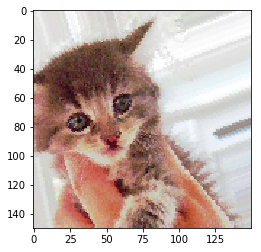

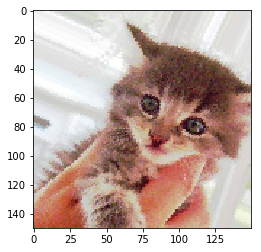

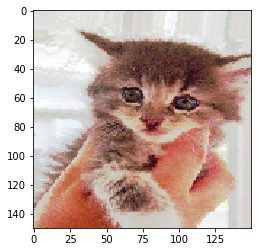

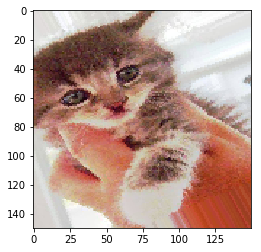

In [14]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img) # converts to numpy array (150, 150, 3)
x = x.reshape((1,) + x.shape) # reshape to (1, 150, 150, 3)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break;
        
plt.show()

## Define new convnet with dropout

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu', ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu', ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu', ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

## Train new convnet using data augmentation generators

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=2000,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=1000)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
2000/2000 [==============================] - 2680s - loss: 0.5551 - acc: 0.7086 - val_loss: 0.4787 - val_acc: 0.7742
Epoch 2/30
2000/2000 [==============================] - 2565s - loss: 0.4586 - acc: 0.7814 - val_loss: 0.4743 - val_acc: 0.7723
Epoch 3/30
2000/2000 [==============================] - 2521s - loss: 0.4029 - acc: 0.8147 - val_loss: 0.4296 - val_acc: 0.7980
Epoch 4/30
2000/2000 [==============================] - 2526s - loss: 0.3535 - acc: 0.8408 - val_loss: 0.4083 - val_acc: 0.8304
Epoch 5/30
2000/2000 [==============================] - 2532s - loss: 0.3093 - acc: 0.8650 - val_loss: 0.3895 - val_acc: 0.8381
Epoch 6/30
2000/2000 [==============================] - 2537s - loss: 0.2721 - acc: 0.8834 - val_loss: 0.3876 - val_acc: 0.8357
Epoch 7/30
2000/2000 [==============================] - 2534s - loss: 0.2399 - acc: 0.8982 - val_loss: 0.3731 - val_acc: 0.8459
Epoch 8/30
2000/2000

In [2]:
model.save('cats_and_dogs_small_2.h5')

NameError: name 'model' is not defined

In [1]:
plot_history_acc_and_loss(history)

NameError: name 'plot_history_acc_and_loss' is not defined

## Using a pre-trained convnet


In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

At this point, there are two ways we could proceed:

1)
Running the convolutional base over our dataset, recording its output to a Numpy array
on disk, then using this data as input to a standalone densely-connected classifier similar
to those you have seen in the first chapters of this book. This solution is very fast and
cheap to run, because it only requires running the convolutional base once for every input
image, and the convolutional base is by far the most expensive part of the pipeline.
However, for the exact same reason, this technique would not allow us to leverage data
augmentation at all.

2)
Extending the model we have (conv_base) by adding Dense layers on top, and running the whole thing end-to-end on the input data. This allows us to use data augmentation,
because every input image is going through the convolutional base every time it is seen
by the model. However, for this same reason, this technique is far more expensive than
the first one.

## Extracting features using pre-trained conv base

In [3]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'c:/srcgit/deeplearning/data/dogs_cats/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size=20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:        
        if i % 100 == 0:
            print(i)
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 2000)
test_features, test_labels = extract_features(test_dir, 2000)
    


Found 2000 images belonging to 2 classes.
0
Found 1000 images belonging to 2 classes.
0
Found 1000 images belonging to 2 classes.
0


In [4]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (2000, 4 * 4 * 512))
test_features = np.reshape(test_features, (2000, 4 * 4 * 512))

In [7]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_features, train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels))


Train on 2000 samples, validate on 2000 samples
Epoch 1/30
2000/2000 [==============================] - 2s - loss: 0.4649 - acc: 0.7755 - val_loss: 0.2944 - val_acc: 0.8830
Epoch 2/30
2000/2000 [==============================] - 2s - loss: 0.2952 - acc: 0.8740 - val_loss: 0.2601 - val_acc: 0.9000
Epoch 3/30
2000/2000 [==============================] - 2s - loss: 0.2409 - acc: 0.9010 - val_loss: 0.2644 - val_acc: 0.8860
Epoch 4/30
2000/2000 [==============================] - 2s - loss: 0.2023 - acc: 0.9180 - val_loss: 0.2456 - val_acc: 0.9010
Epoch 5/30
2000/2000 [==============================] - 2s - loss: 0.1797 - acc: 0.9360 - val_loss: 0.2941 - val_acc: 0.8770
Epoch 6/30
2000/2000 [==============================] - 2s - loss: 0.1520 - acc: 0.9455 - val_loss: 0.2348 - val_acc: 0.9070
Epoch 7/30
2000/2000 [==============================] - 2s - loss: 0.1381 - acc: 0.9520 - val_loss: 0.2657 - val_acc: 0.8900
Epoch 8/30
2000/2000 [==============================] - 2s - loss: 0.1219 - a

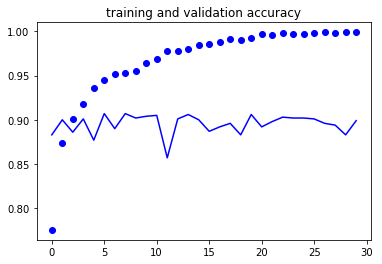

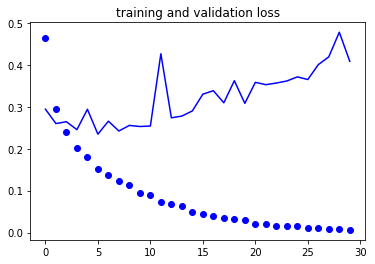

In [10]:
plot_history_acc_and_loss(history)

## Visualizing what convnet learns

1)
Visualizing intermediate convnet outputs ("intermediate activations"). This is useful to
understand how successive convnet layers transform their input, and to get a first idea of
the meaning of individual convnet filters.

2)
Visualizing convnets filters. This is useful to understand precisely what visual pattern or
concept each filter in a convnet is receptive to.

3)
Visualizing heatmaps of class activation in an image. This is useful to understand which
part of an image where identified as belonging to a given class, and thus allows to
localize objects in images.

## 1) Visualizing intermidiate activations

In [142]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [143]:
#img_path = 'c:\\srcgit\\deeplearning\\data\\dogs_cats\\cats_and_dogs_small\\train\\dogs\\dog.105.jpg'
img_path = 'c:\\temp\\tucker_dog_or_cat.jpg'
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

img_tensor /= 255.

print(img_tensor.shape)

(1, 150, 150, 3)


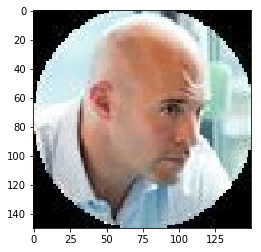

In [144]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [145]:
model.predict(img_tensor)

array([[ 0.68515211]], dtype=float32)

In [137]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [138]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[7]
print(first_layer_activation.shape)

(1, 7, 7, 128)


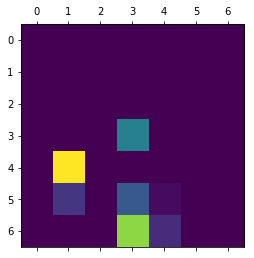

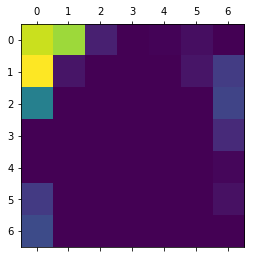

In [139]:
plt.matshow(first_layer_activation[0, :, :, 4])
plt.show()
plt.matshow(first_layer_activation[0, :, :, 7])
plt.show()

conv2d_5


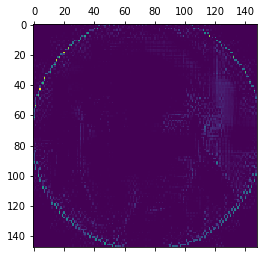

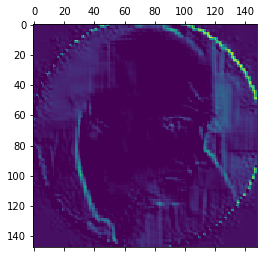

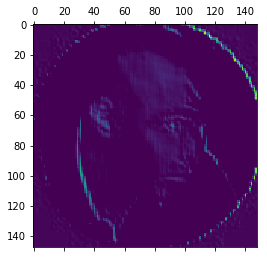

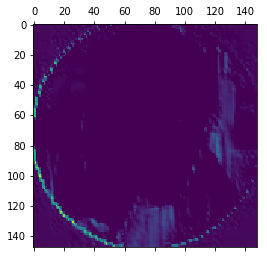

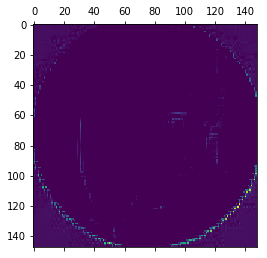

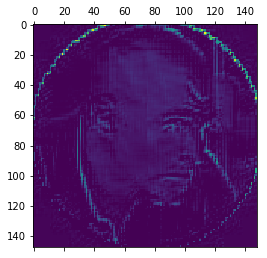

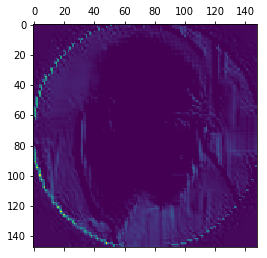

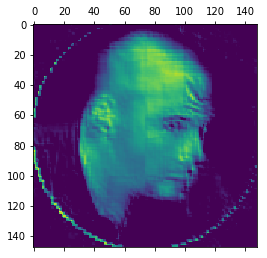

conv2d_6


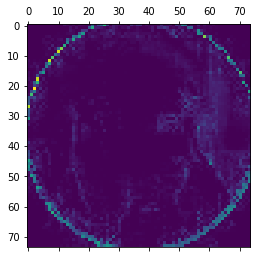

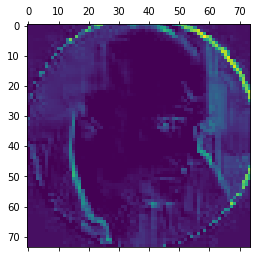

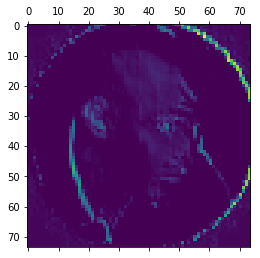

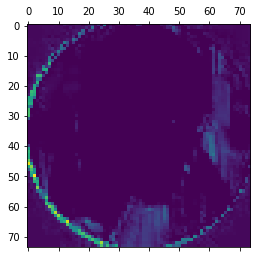

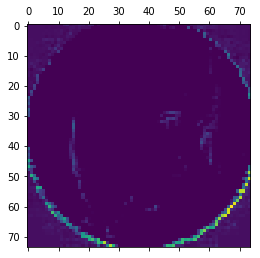

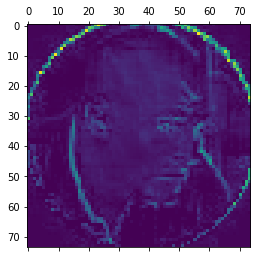

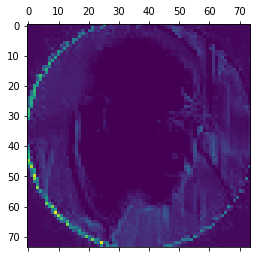

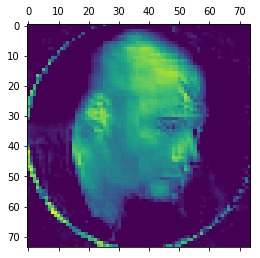

conv2d_7


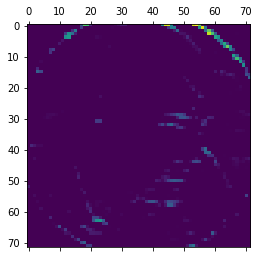

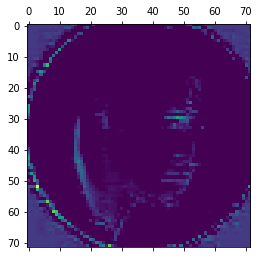

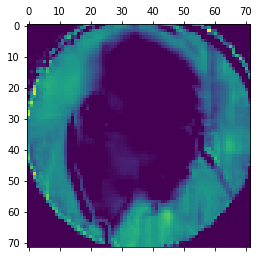

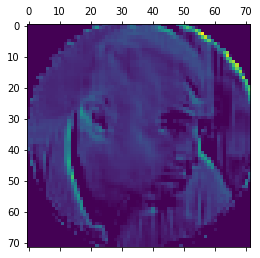

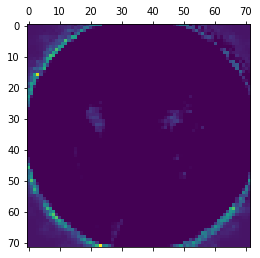

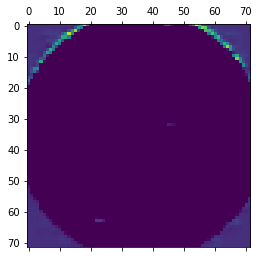

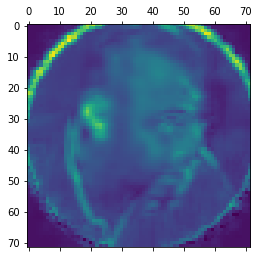

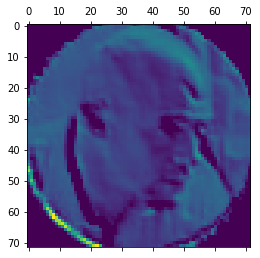

conv2d_8


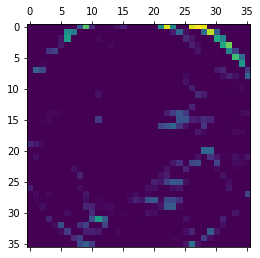

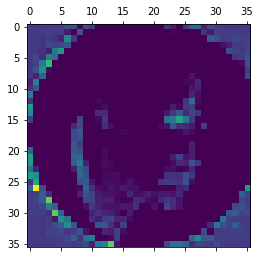

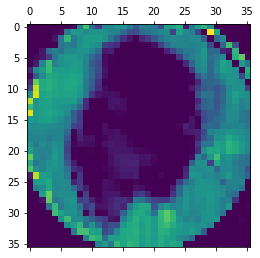

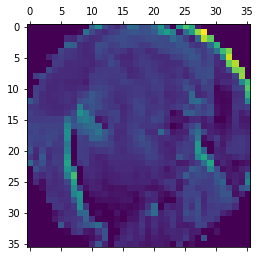

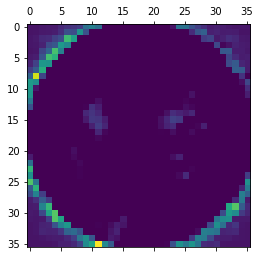

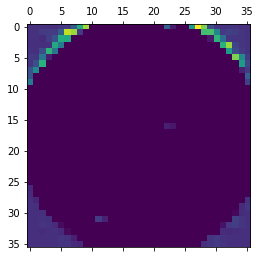

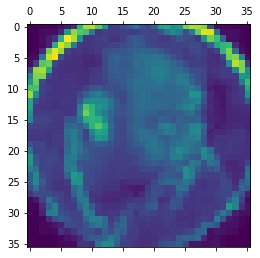

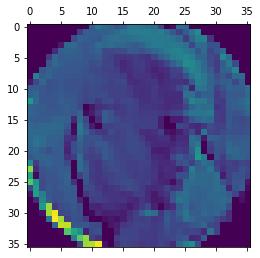

In [140]:
from keras import layers

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:8]:
    if isinstance(layer, layers.Conv2D):
        layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    print(layer_name)
    for i in range(8):
        plt.matshow(layer_activation[0, :, :, i])
        plt.show()
        

In [141]:
from quiver_engine import server
server.launch(model, 
              input_folder='c:\\srcgit\\deeplearning\\data\\dogs_cats\\cats_and_dogs_small\\quiver_test\\',
             temp_folder='c:\\tmp\\',)

Starting webserver from: C:\Users\m.hron\AppData\Local\Continuum\Anaconda3\lib\site-packages\quiver_engine-0.1.4.1.5-py3.6.egg\quiver_engine


::1 - - [2017-07-24 19:58:58] "GET /model HTTP/1.1" 200 7256 0.002504
::1 - - [2017-07-24 19:58:58] "GET /inputs HTTP/1.1" 200 323 0.001499
C:\Users\m.hron\AppData\Local\Continuum\Anaconda3\lib\site-packages\quiver_engine-0.1.4.1.5-py3.6.egg\quiver_engine\layer_result_generators.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("ma...)`
  output=model.get_layer(layer_name).output
::1 - - [2017-07-24 19:59:14] "GET /layer/max_pooling2d_8/tucker_dog_or_cat.jpg HTTP/1.1" 200 6690 0.437534
[2017-07-24 19:59:14,878] ERROR in app: Exception on /predict/tucker_dog_or_cat.jpg [GET]
Traceback (most recent call last):
  File "C:\Users\m.hron\AppData\Local\Continuum\Anaconda3\lib\site-packages\flask\app.py", line 1982, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\m.hron\AppData\Local\Continuum\Anaconda3\lib\site-packages\flask\app.py", line 1614, in full_dispatch_request
    rv = self.handle_user_exception(e)
  

Warning! you didn't pass your own set of classes for the model therefore imagenet classes are used


::1 - - [2017-07-24 19:59:18] "GET /layer/max_pooling2d_5/tucker_dog_or_cat.jpg HTTP/1.1" 200 1766 0.316170
::1 - - [2017-07-24 19:59:21] "GET /layer/max_pooling2d_6/tucker_dog_or_cat.jpg HTTP/1.1" 200 3398 0.356832
KeyboardInterrupt
Mon Jul 24 20:05:39 2017


KeyboardInterrupt: 